In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("drive_results.csv")
df.head()

,Unnamed: 0,team,result,details,drive_start,game_id
0,0,buf,FIELD GOAL,"4 PLAYS, 5 YARDS, 1:30",1st & 10 at PIT 24,401326308
1,1,pit,PUNT,"5 PLAYS, 22 YARDS, 2:55",1st & 10 at PIT 25,401326308
2,2,buf,PUNT,"10 PLAYS, 33 YARDS, 5:30",1st & 10 at BUF 12,401326308
3,3,pit,PUNT,"3 PLAYS, -7 YARDS, 1:15",1st & 10 at PIT 20,401326308
4,4,buf,PUNT,"3 PLAYS, 9 YARDS, 1:09",1st & 10 at BUF 37,401326308


In [3]:
df["number_plays"] = df["details"].apply(lambda x: int(x.split(" ")[0]))
df["yards"] = df["details"].apply(lambda x: int(x.split(" ")[2]))
df["time_of_possesion"] = df["details"].apply(lambda x: x.split(" ")[-1])

print(df["number_plays"].unique())
print(df["yards"].unique())
print(df["time_of_possesion"].unique())


[ 4  5 10  3  6  7 13  1 12 11  8  9  2 14 18 15  0 16 17 19 20]
[  5  22  33  -7   9  25  34  -2  -8   0  91  -1  69  40  62  27  52  67
  48  -3  16 -13  17  76  42  29  32  57   2   6  70  11  93  12   8  84
  38  55  75  54   3   1  68   7  19  85  45 -15  -6  47  23  18  36  15
  46  65  81  39  30  72  80 -11  63  -5  41  20  71  37  87  28 -10  13
  31  74  10   4  50  14  60  24  59  82  78  44  86  -4  61  83  21  73
  49  66  94  64  35  92  77  90  56  79  43  53 -14  26 -16  97  58 -12
  -9  88  51  89  95 -17  96  98 -18  99]
['1:30' '2:55' '5:30' '1:15' '1:09' '3:40' '3:03' '1:26' '0:54' '2:37'
 '5:39' '0:22' '4:37' '4:35' '4:01' '3:05' '2:23' '1:34' '4:22' '2:41'
 '1:56' '0:46' '3:36' '2:26' '1:20' '3:01' '3:27' '4:40' '2:04' '2:00'
 '3:12' '0:08' '1:31' '0:35' '1:40' '1:42' '2:15' '2:20' '0:58' '7:43'
 '2:33' '2:31' '0:49' '0:30' '7:02' '2:14' '5:05' '4:13' '3:25' '1:21'
 '1:04' '1:18' '0:29' '3:52' '1:39' '4:44' '1:36' '1:33' '0:26' '2:53'
 '2:17' '1:58' '2:18' '2:45' 

In [4]:
df.head()
print(df[df["drive_start"].isna()])
print(len(df))

      Unnamed: 0 team       result                   details drive_start  \
159          159  atl  END OF HALF    0 PLAYS, 0 YARDS, 0:02         NaN   
211          211  det  END OF HALF    0 PLAYS, 0 YARDS, 0:03         NaN   
334          334  dal  END OF GAME    1 PLAY, 11 YARDS, 0:02         NaN   
408          408   tb         PUNT   8 PLAYS, 20 YARDS, 3:11         NaN   
512          512  pit  END OF HALF    0 PLAYS, 0 YARDS, 0:02         NaN   
624          624   kc  END OF HALF    0 PLAYS, 0 YARDS, 0:03         NaN   
1240        1240   sf       FUMBLE    0 PLAYS, 0 YARDS, 0:06         NaN   
1283        1283  pit  END OF HALF    0 PLAYS, 0 YARDS, 0:05         NaN   
1427        1427  hou  END OF HALF    0 PLAYS, 0 YARDS, 0:02         NaN   
1505        1505   tb   FIELD GOAL  10 PLAYS, 51 YARDS, 4:10         NaN   
1633        1633   kc       FUMBLE    0 PLAYS, 0 YARDS, 0:07         NaN   
1642        1642  buf  END OF HALF    0 PLAYS, 0 YARDS, 0:02         NaN   
1998        

In [5]:
df = df.dropna()
df = df[df.drive_start.str.startswith("1")]
def yardsAwayFromDetails(drive_start, team):
    lst = drive_start.split()
    if(team.lower() == lst[-2].lower()):
        return 100 - int(lst[-1])
    else:
        return int(lst[-1])
for i in df.drive_start:
    if(i.split()[-2] == "at"):
        print(i)
print(df["drive_start"].apply(lambda x: x.split()[-2]).unique())
df["yards_to_go"] = df.apply(lambda x: yardsAwayFromDetails(x["drive_start"], x["team"]), axis = 1)

print(df.yards_to_go.unique())

1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
1st & 10 at 50
['PIT' 'BUF' 'NYJ' 'CAR' 'at' 'HOU' 'JAX' 'TEN' 'ARI' 'LAC' 'WSH' 'NE'
 'MIA' 'CLE' 'KC' 'ATL' 'PHI' 'MIN' 'CIN' 'DET' 'SF' 'IND' 'SEA' 'NO' 'GB'
 'NYG' 'DEN' 'LV' 'BAL' 'TB' 'DAL' 'CHI' 'LAR']
[24 75 88 80 63 87 77 93 35 55 91 64 52 74 45 78 50 85 32 57 62 79 59 84
 73 70 54 76 48  7 69 72 89 68 61  1 65 53 90 33 43 67 66 97 83 71 81 96
  3 82 99 15 58 92 86 22 31 51 30 95 38 49 60 12 21 98 94 41 27 34 29 44
 39 46 28 19 42 25 18  6 56 23 17  9 36 47 37 13 14 26 40 10 20 16 11  8
  2  5]


In [6]:
def pointsScored(result):
    if(result == 'FIELD GOAL'):
        return 3
    elif(result == 'TOUCHDOWN'):
        return 7
    else:
        return 0
df["points_scored"] = df["result"].apply(lambda x: pointsScored(x))
print(df.points_scored.unique())

[3 0 7]


In [7]:
df.head(50)

,Unnamed: 0,team,result,details,drive_start,game_id,number_plays,yards,time_of_possesion,yards_to_go,points_scored
0,0,buf,FIELD GOAL,"4 PLAYS, 5 YARDS, 1:30",1st & 10 at PIT 24,401326308,4,5,1:30,24,3
1,1,pit,PUNT,"5 PLAYS, 22 YARDS, 2:55",1st & 10 at PIT 25,401326308,5,22,2:55,75,0
2,2,buf,PUNT,"10 PLAYS, 33 YARDS, 5:30",1st & 10 at BUF 12,401326308,10,33,5:30,88,0
3,3,pit,PUNT,"3 PLAYS, -7 YARDS, 1:15",1st & 10 at PIT 20,401326308,3,-7,1:15,80,0
4,4,buf,PUNT,"3 PLAYS, 9 YARDS, 1:09",1st & 10 at BUF 37,401326308,3,9,1:09,63,0
5,5,pit,PUNT,"6 PLAYS, 25 YARDS, 3:40",1st & 10 at PIT 13,401326308,6,25,3:40,87,0
6,6,buf,PUNT,"7 PLAYS, 34 YARDS, 3:03",1st & 10 at BUF 23,401326308,7,34,3:03,77,0
7,7,pit,PUNT,"3 PLAYS, -2 YARDS, 1:26",1st & 10 at PIT 7,401326308,3,-2,1:26,93,0
8,8,buf,FUMBLE,"3 PLAYS, -8 YARDS, 0:54",1st & 10 at PIT 35,401326308,3,-8,0:54,35,0
9,9,pit,PUNT,"4 PLAYS, 0 YARDS, 2:37",1st & 10 at PIT 45,401326308,4,0,2:37,55,0


[]

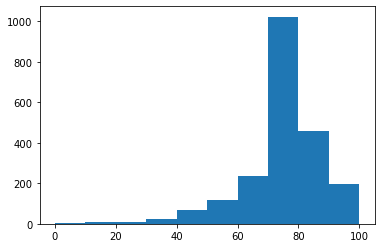

In [8]:
plt.hist(df[df.points_scored == 0].yards_to_go, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.plot()


[]

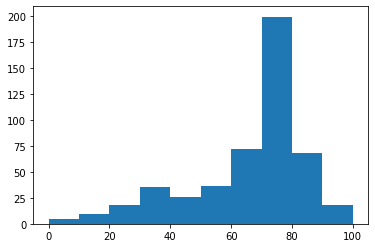

In [9]:
plt.hist(df[df.points_scored == 3].yards_to_go, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.plot()


[]

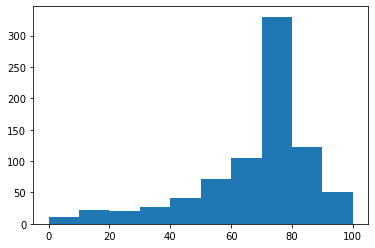

In [10]:
plt.hist(df[df.points_scored == 7].yards_to_go, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.plot()

In [12]:
def get_best_distribution(data):
    dist_names = ["alpha", "anglit", "arcsine", "argus", "beta", "betaprime", "bradford", "burr", "burr12", "cauchy","chi","chi2","cosine","crystalball","dgamma","dweibull","erlang","expon","exponnorm","exponweib","exponpow","f","fatiguelife","fisk","foldcauchy","foldnorm","genlogistic","gennorm","genpareto","genexpon","genextreme","gausshyper","gamma","gengamma","genhalflogistic","geninvgauss","gilbrat","gompertz","gumbel_r","gumbel_l","halfcauchy","halflogistic","halfnorm","halfgennorm","hypsecant","invgamma","invgauss","invweibull","johnsonsb","johnsonsu","kappa4","kappa3","ksone","laplace","logistic","loggamma","loglaplace","lognorm","loguniform","lomax","maxwell","mielke","moyal","nakagami","ncx2","ncf","nct","norm","norminvgauss","pareto","pearson3","powerlaw","powerlognorm","powernorm","rdist","rayleigh","rice","recipinvgauss","semicircular","skewnorm","t","triang","truncexpon","truncnorm","tukeylambda","uniform","vonmises","vonmises_line","wald","weibull_min","weibull_max","wrapcauchy"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]


In [14]:
model1, p1, params1 = get_best_distribution(df[df.points_scored == 0].yards_to_go)
model2, p2, params2 = get_best_distribution(df[df.points_scored == 3].yards_to_go)
model3, p3, params3 = get_best_distribution(df[df.points_scored == 7].yards_to_go)

/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide

/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 47.98162647250709.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 47.291291124633446.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 49.68034802354069.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 52.03147891336421.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/sci

/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3487: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3093: RuntimeWarning: divide by zero encountered in power
  tmp0 = tmp**(limit-1)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3094: RuntimeWarning: invalid value encountered in multiply
  tmp2 = tmp0*tmp
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3675: RuntimeWarning: Infinite values encountered in scipy.special.kve(p, b). Values replaced by NaN to avoid incorrect results.
  warnings.warn(msg, Runt

Best fitting distribution: gompertz
Best p value: 2.499791105492934e-45
Parameters for the best fit: (0.0029964480509820065, 20.9999999314674, 10.164807593219042)


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1500000000000004.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1000000000000005.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been 

/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:98: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:101: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages

Best fitting distribution: hypsecant
Best p value: 2.866051815118001e-10
Parameters for the best fit: (69.63914699528229, 11.808703986335937)


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.1.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0666666666666664.
  warnings.warn(
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2958: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-int

/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3487: RuntimeWarning: invalid value encountered in true_divide
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:98: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:101: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)
/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/jacknonnie/opt/a

Best fitting distribution: johnsonsu
Best p value: 3.5189434822973735e-16
Parameters for the best fit: (0.5897133458329886, 0.7854941923638672, 77.69332673170564, 6.069287150147041)


/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


In [15]:
print(p1,p2,p3)

2.499791105492934e-45 2.866051815118001e-10 3.5189434822973735e-16


In [30]:
y = df.points_scored.values.reshape(-1,1)
x = df.yards_to_go.values.reshape(-1,1)
model = LogisticRegression(max_iter = 10000, multi_class='multinomial', solver='saga')
model.fit(x, y)
predictx = []
for i in range(1,99):
    predictx.append([i])
predict = model.predict_proba(predictx)
print(predict)

[[0.15358524 0.3900249  0.45638985]
 [0.15778141 0.38699353 0.45522506]
 [0.16206934 0.38393152 0.45399914]
 [0.16644982 0.38083888 0.4527113 ]
 [0.17092358 0.37771563 0.45136079]
 [0.17549127 0.37456186 0.44994686]
 [0.18015351 0.37137766 0.44846883]
 [0.18491079 0.36816318 0.44692603]
 [0.18976358 0.36491859 0.44531783]
 [0.19471222 0.3616441  0.44364367]
 [0.19975702 0.35833997 0.44190301]
 [0.20489815 0.35500648 0.44009537]
 [0.21013573 0.35164397 0.4382203 ]
 [0.21546975 0.34825281 0.43627744]
 [0.22090014 0.34483341 0.43426645]
 [0.22642669 0.34138625 0.43218706]
 [0.23204913 0.33791181 0.43003907]
 [0.23776703 0.33441065 0.42782233]
 [0.24357988 0.33088336 0.42553676]
 [0.24948707 0.32733058 0.42318235]
 [0.25548784 0.323753   0.42075916]
 [0.26158133 0.32015136 0.41826731]
 [0.26776655 0.31652643 0.41570702]
 [0.27404241 0.31287903 0.41307856]
 [0.28040767 0.30921005 0.41038228]
 [0.28686097 0.3055204  0.40761863]
 [0.29340083 0.30181105 0.40478811]
 [0.30002566 0.29808301 0.40

/Users/jacknonnie/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
len(df[(df.points_scored == 7) & (df.yards_to_go <= 5) & (df.yards_to_go > 0)])
for i in range(5,101,5):
    cnt7 = len(df[(df.points_scored == 7) & (df.yards_to_go <= i) & (df.yards_to_go > i-5)])
    cnt3 = len(df[(df.points_scored == 3) & (df.yards_to_go <= i) & (df.yards_to_go > i-5)])
    cnt0 = len(df[(df.points_scored == 0) & (df.yards_to_go <= i) & (df.yards_to_go > i-5)])
    cnt = cnt0+cnt3+cnt7
    print([1.0*cnt0/(cnt),1.0*cnt3/cnt,1.0*cnt7/cnt],predict[i-3])

[0.125, 0.125, 0.75] [0.16206934 0.38393152 0.45399914]
[0.08333333333333333, 0.5, 0.4166666666666667] [0.18491079 0.36816318 0.44692603]
[0.25, 0.05, 0.7] [0.21013573 0.35164397 0.4382203 ]
[0.11764705882352941, 0.35294117647058826, 0.5294117647058824] [0.23776703 0.33441065 0.42782233]
[0.2857142857142857, 0.3333333333333333, 0.38095238095238093] [0.26776655 0.31652643 0.41570702]
[0.09090909090909091, 0.48484848484848486, 0.42424242424242425] [0.30002566 0.29808301 0.40189133]
[0.32608695652173914, 0.34782608695652173, 0.32608695652173914] [0.33435887 0.27920093 0.38644021]
[0.2727272727272727, 0.38636363636363635, 0.3409090909090909] [0.37050206 0.26002783 0.36947011]
[0.4925373134328358, 0.19402985074626866, 0.31343283582089554] [0.40811625 0.24073447 0.35114928]
[0.575, 0.1625, 0.2625] [0.44679745 0.22150842 0.33169413]
[0.5339805825242718, 0.1650485436893204, 0.30097087378640774] [0.48609239 0.20254595 0.31136166]
[0.5177304964539007, 0.18439716312056736, 0.2978723404255319] [0.